### An implementation of a simple neural network

#### Data Loading and Network Setup

In [3]:
import numpy as np
%matplotlib inline 
import matplotlib.pyplot as plt
from data_loader import MnistDataloader
from IPython.display import display, clear_output

print("Loading dataset...")
mnist_dataloader = MnistDataloader("dataset")
(x_train, y_train), (x_test, y_test) = mnist_dataloader.load_data()
x_train_images = np.array(x_train) # 60000 x 28 x 28
y_train = np.array(y_train) # 60000
x_test_images = np.array(x_test)   # 10000 x 28 x 28
y_test = np.array(y_test)   # 10000

# Convert tensor to lower dimension and normalize
print("Reshaping dataset...")
x_train = x_train_images.reshape(x_train_images.shape[0], -1) # 60000 x 784
x_train = x_train / 255.0
x_test = x_test_images.reshape(x_test_images.shape[0], -1)    # 10000 x 784
x_test = x_test / 255.0

# Apply one-hot-coding to labels
y_train_hot = np.zeros((y_train.size, 10))
y_train_hot[np.arange(y_train.size), y_train] = 1   # 60000 x 10
y_test_hot = np.zeros((y_test.size, 10))
y_test_hot[np.arange(y_test.size), y_test] = 1      # 10000 x 10

# Construct network
print("Creating network...")
layer_1 = 128
layer_2 = 10
weights_1 = np.random.randn(x_train.shape[1], layer_1) * 0.01  # 784 x 128
biases_1 = np.zeros(layer_1)                                   # 128
weights_2 = np.random.randn(layer_1, layer_2) * 0.01           # 128 x 10
biases_2 = np.zeros(layer_2)                                   # 10
print("Done")

Loading dataset...
Reshaping dataset...
Creating network...
Done


#### Network Training

'Training 59000 of 60000 done.'

[2.301553963205995, 2.295617925954243, 2.314165250213574, 2.3153542491740176, 2.306037475548188, 2.32855500140638, 2.296796236394692, 2.3079373096557787, 2.2881284074102988, 2.3208611975186066, 2.300423680230671, 2.3117073754740596, 2.2730272979819732, 2.329208264195108, 2.2834181156683298, 2.3218360201344117, 2.311485729906542, 2.327121309186818, 2.3127510491727756, 2.313697761391948, 2.3092912873419804, 2.2991559162400077, 2.299276884980263, 2.2873026654529625, 2.2825073735747066, 2.32203098931922, 2.301178443089127, 2.275936846344784, 2.303162727156793, 2.3249182675755073, 2.2728208603828404, 2.3307887194567725, 2.3201299976024705, 2.2986119292179907, 2.305784470958776, 2.328616513318149, 2.3165057774724325, 2.2824897555345744, 2.319770501360114, 2.3006036302005612, 2.2852935044946365, 2.3304986602192823, 2.3165382278476736, 2.3048625020886955, 2.2775268125617316, 2.292092902243152, 2.320902765688411, 2.32805236486845, 2.2853344409530107, 2.261685078900488, 2.2552993003412327, 2.288

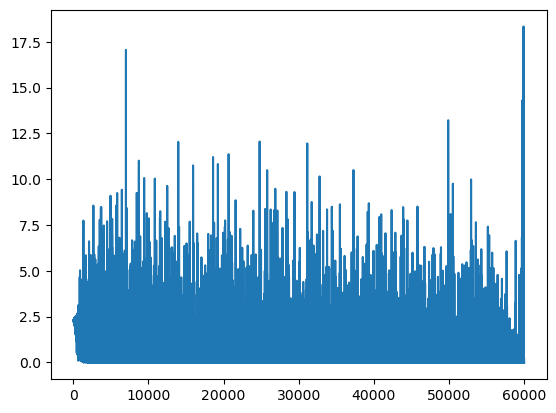

In [4]:
# ReLU activation function
def relu(vector):
    return np.maximum(0, vector)


# Derivative function of ReLU
def relu_derivative(x):
    return (x > 0).astype(float)


# Softmax activation function
def softmax(vector):
    exp_vector = np.exp(vector)
    return exp_vector / np.sum(exp_vector)


# Cross entropy loss function
def ce_loss(output_vector, label_vector):
    return -np.sum(label_vector * np.log(output_vector))

# Run network
learning_rate = 0.01
losses = []
for index in range(x_train.shape[0]):
    if index != 0 and index % 1000 == 0:
        clear_output(wait=True)
        display(f"Training {index} of {x_train.shape[0]} done.")

    # Forward pass
    output_1 = relu(np.dot(x_train[index], weights_1) + biases_1)
    output_2 = softmax(np.dot(output_1, weights_2) + biases_2)
    losses.append(ce_loss(output_2, y_train_hot[index]))

    # Backward pass
    d_output_2 = output_2 - y_train_hot[index]  # Combined derivative of softmax and ce loss
    d_loss_weights_2 = np.outer(output_1, d_output_2)
    d_output_1 = np.dot(weights_2, d_output_2) * relu_derivative(output_1)
    d_loss_weights_1 = np.outer(x_train[index], d_output_1)

    weights_2 -= learning_rate * d_loss_weights_2
    biases_2 -= learning_rate * d_output_2
    weights_1 -= learning_rate * d_loss_weights_1
    biases_1 -= learning_rate * d_output_1

print(losses)
plt.plot(losses)
print("Done")

In [5]:
import pickle
pickle.dump([
    weights_1,
    biases_1,
    weights_2,
    biases_2
], open("tmp.pickle", "wb"))

#### Test Network

[0.00033866874467932345, 0.06639134900111605, 0.0015391466472722503, 3.169912466654925e-05, 0.012959055673842227, 0.001341850845820704, 0.0005042942930188639, 0.010365253200898325, 0.4262273652926227, 0.012332170879402554, 3.290620914863722e-05, 0.033847589011998434, 0.0010085115352032356, 2.7820888448997868e-05, 0.00027446889456218826, 0.15955758732533354, 0.0006609826464025844, 0.0004991699297550935, 0.005109141686064946, 0.0005155970798963551, 0.0007825700726954751, 0.07968700969820812, 0.0016015203010449138, 3.9052552023585925e-05, 0.010832376008047928, 1.1372571596386044e-06, 0.008935182840922679, 0.0005960255119353906, 3.4291569314443635e-06, 0.0012934776457387573, 0.0011474304754722424, 0.005493033997342745, 0.00012879181099244405, 0.8243248865980353, 0.004556935845420328, 0.0006281442670412705, 0.008575569240819716, 0.0003418596857585334, 1.5997763872558, 0.0013836322107413307, 0.006558244535093899, 0.021168154352851003, 0.002560691501896877, 0.006238766976863371, 0.00948915567

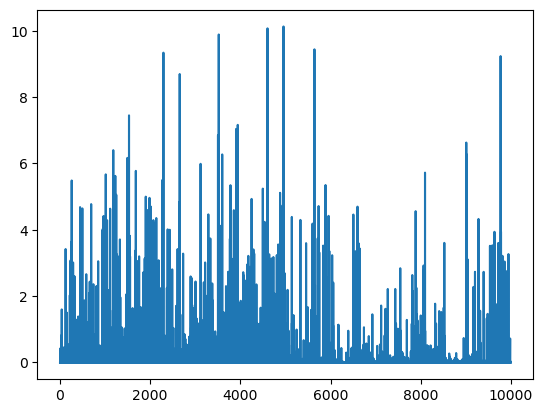

In [6]:
test_outputs = []
test_losses = []
for index in range(x_test.shape[0]):
    output_1 = relu(np.dot(x_test[index], weights_1) + biases_1)
    output_2 = softmax(np.dot(output_1, weights_2) + biases_2)
    loss = ce_loss(output_2, y_test_hot[index])
    test_outputs.append(output_2)
    test_losses.append(loss)

print(test_losses)
plt.plot(test_losses)

Index of max value: 4956
Accuracy: 95.59 %
Label:  2 - Prediction: 2 -> True


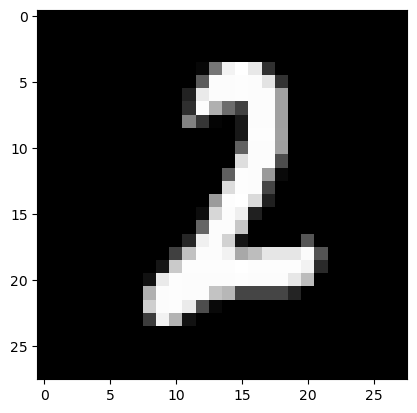

<BarContainer object of 10 artists>

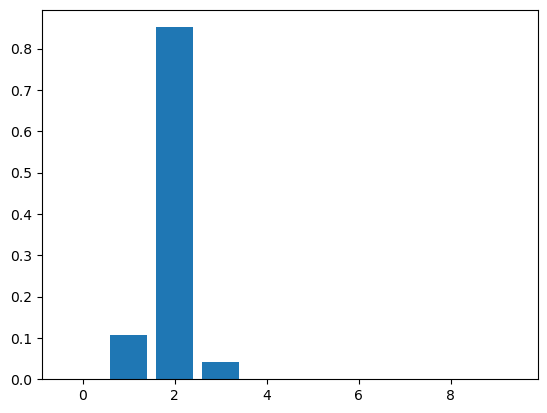

In [7]:
# Print max value index
max_index = test_losses.index(max(test_losses))
print("Index of max value:", max_index)

# Print accuracy
hits = [np.argmax(test_outputs[index]) == y_test[index] for index in range(len(x_test))]
print("Accuracy:", sum(hits) / len(hits) * 100, "%")

# Plotting the bar chart
index = 2296
print("Label: ", y_test[index], "- Prediction:", np.argmax(test_outputs[index]), "->", hits[index])
plt.imshow(x_test_images[index], cmap=plt.cm.gray)
plt.show()
plt.bar(range(len(test_outputs[index])), test_outputs[index])
